In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


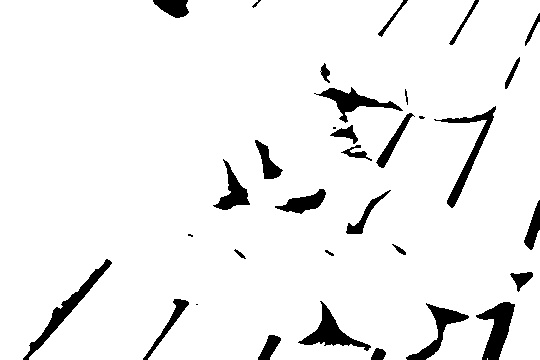

Number of Contours found = 1


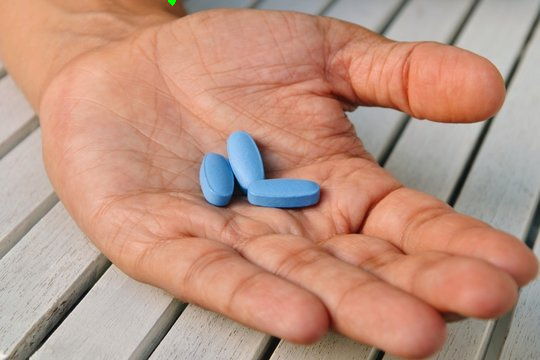

In [48]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow



image = cv.imread('/content/drive/MyDrive/image/E2.jpg',)
img_gray = cv.imread('/content/drive/MyDrive/image/E2.jpg',0)
# cv2_imshow(img_gray)
blur = cv.GaussianBlur(img_gray,(11,11),1)
# print("Blur IMG")
# cv2_imshow(blur)

# global thresholding
ret1,th1 = cv.threshold(blur,100,255,cv.THRESH_BINARY)A

# แบบ ที่2
kernel  = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
dilate = cv.dilate(th1,kernel,iterations= 6)
open = cv.morphologyEx(dilate,cv.MORPH_OPEN,kernel,iterations=10)

# Find Canny edges
edged = cv.Canny(open, 30, 200)
# cv2_imshow(edged)


# Finding Contours
contours, hierarchy = cv.findContours(edged,  cv.RETR_EXTERNAL , cv.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
cv.drawContours(image, contours, -1, (0, 255, 0), 3)



# หาจุดศูนย์กลาง
i=1
for c in contours:
# calculate moments for each contour
   M = cv.moments(c)
   # calculate x,y coordinate of center
   cX = int(M["m10"] / M["m00"])
   cY = int(M["m01"] / M["m00"])


  #  สร้างชื่อหรือตัวเลข
   cv.putText(image, str(i), (cX - 25, cY - 25),cv.FONT_HERSHEY_SIMPLEX,1, (0, 0, 255), 2)
   # display the image
   i=i+1

cv2_imshow(image)
